Creació de imatges amb soroll que serveixin per a entrenar una xarxa neuronal

Modificacions a la imatge inicial:
- Retall a diferents altures
- Afegir soroll a l'imatge
- Aplicar homografies 


In [2]:
# importar imatges
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random



Lectura de imatges i labels:

In [3]:

#carpeta on es troben les imatges
path = 'numbers'

#llegeix les imatges i labels
album = []
labels = []
for img in os.listdir(path):
    if img.endswith('.png'):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        album.append(img_array)
        labels.append(int(img[6]))


Funció per a retallar:

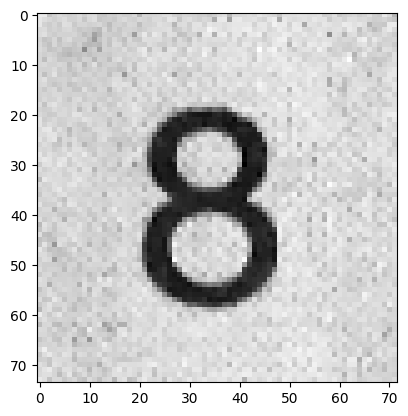

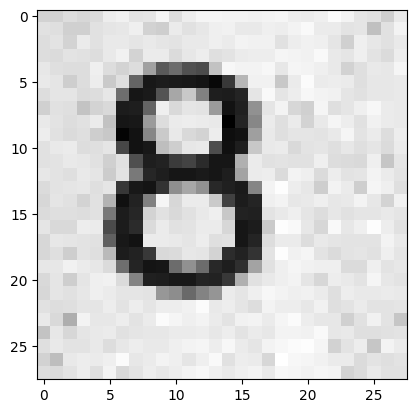

In [15]:
#Retallar aleatoriament
def retallar(img):
    img = img.copy()
    #resize a 32x32
    img = cv2.resize(img, (32,32))
    altura, amplada = img.shape
    x = random.randint(0,4)
    y = random.randint(0,4)    
    img = img[y:y+28, x:x+28] 
    return img

#retallar una imatge
plt.imshow(album[0], cmap='gray')
plt.show()
img = album[0]
img = retallar(img)
plt.imshow(img, cmap='gray')
plt.show()
    


Funció per a afegir contorns:

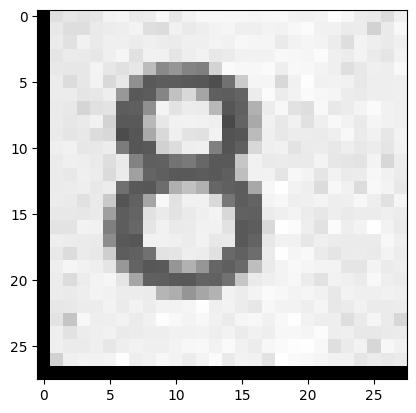

In [23]:
#Afegir contorns a les imatges
def afegir_contorns(img):
   img = img.copy()
   if random.random() < 0.5:
      for j in range (img.shape[1]):
         img[0, j] = 0
   if random.random() < 0.5:
      for j in range (img.shape[1]):
         img[img.shape[0]-1, j] = 0
   if random.random() < 0.5:
      for i in range (img.shape[0]):
         img[i, 0] = 0
   if random.random() < 0.5:
      for i in range (img.shape[0]):
         img[i, img.shape[1]-1] = 0

   return img

#retallar una imatge

img = album[0]
img = retallar(img)
img = afegir_contorns(img)
plt.imshow(img, cmap='gray')
plt.show()

Funció per a afegir soroll:

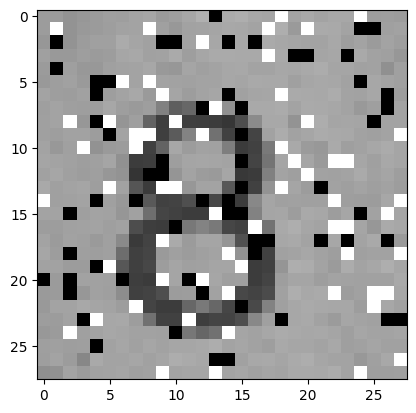

In [21]:
#afegir soroll a les imatges
def afegir_soroll(img):
    img = img.copy()
    probabilitat = random.randint(0,2)/25
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if random.random() < probabilitat:
                img[i][j] = 255
            elif random.random() > 1-probabilitat:
                img[i][j] = 0
    return img

#retallar una imatge

img = album[0]
img = retallar(img)
img = afegir_soroll(img)
plt.imshow(img, cmap='gray')
plt.show()

Funció per a difuminar:

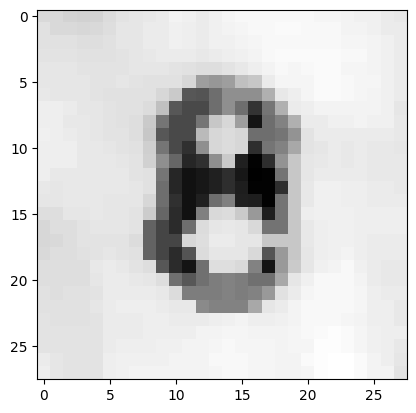

In [27]:
# difuminar les imatges
def difuminar(img):
    img = img.copy()
    return cv2.medianBlur(img, 5)

#retallar una imatge
img = album[0]
img = retallar(img)
img = difuminar(img)
plt.imshow(img, cmap='gray')
plt.show()


Creació de noves imatges:

In [7]:
#crea 500 imatges noves
for j in range (0, 9000):
    count = 0
    i = j%(len(album)-9)
    img = album[i+9].copy()
    img = retallar(img)
    if random.random() < 0.5:
        img = afegir_contorns(img)
    if random.random() < 0:
        img = afegir_soroll(img)
    if random.random() < 3:
        img = difuminar(img)
    #guardar imatges
    nom = ('numbers/train/img'+ str(j) + '_' + str(labels[i]) + '.png')
    cv2.imwrite(nom, img)
    #guardar labels

for j in range (0, 1000):
    count = 0
    i = j%len(album)
    img = album[i].copy()
    img = retallar(img)
    if random.random() < 0.5:
        img = afegir_contorns(img)
    if random.random() < 0.5:
        img = afegir_soroll(img)
    if random.random() < 0.5:
        img = difuminar(img)
    #guardar imatges
    nom = ('numbers/test/img'+ str(j) + '_' + str(labels[i]) + '.png')
    cv2.imwrite(nom, img)
    #guardar labels
